***NOTE***

Although this particular PDF is for the finished version of the project, I suggest you take a look at the full 'CODED' pdf as it contains more information and the flow of the project is really good overthere. This was for the purpose of more following the objective of the midterm project.

# Task

The aim of this analysis is to perform a classification algorithm on the Dry Bean dataset.

# Data description

The data set that I will use can be found from:

$$
\text{Dry Bean Dataset. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C50S4B.}
$$
$$
.
$$

This dataset consists of 16 diverse variables intended to aid in the classification task. The goal is to determine the species of bean based on the provided characteristics. To conduct this classification, the following features are considered: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRatio, Eccentricity, ConvexArea, EquivalentDiameter, Extent, Solidity, Roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, and ShapeFactor4.

The dataset comprises 13,611 samples (n) with 7 distinct classifications for the response variable ('Class').).

# Preprocessing

## Exploratory Data Analysis (EDA)

### Data observation

* First, we'll take a look at the data itself. This means we'll open up the data files and check out the first few rows of what's inside. This helps us understand what the data looks like, which is important for later steps. $\textbf{fig. 1}$ shows a quick peek at the beginning of the data, so we can see what's there.

### Data information

* Next, we'll take a closer look at our data by examining its various data types. $\textbf{fig.2}$

* It's also important to check for missing values and duplicates, as these can lead to biased results. In my dataset, there were no missing values detected.

* Following that, we'll delve into the descriptions of each feature to identify any anomalies. After analyzing the descriptive statistics, we observed several noteworthy patterns in each parameter corresponding to its respective feature. For instance, when focusing on the 'Area' feature, we noticed a potential outlier due to its wide data range [min, max], especially considering the left-skewed distribution of the mean. This observation is illustrated in the visualization below. It's worth mentioning that although we specifically examine the 'Area' feature in detail to save time, the insights gained can generally apply to all variables.

* Although I did not quite deal with any outliers, there are multiple ways that one can deal with this by looking at residuals or the hat matrix of our features.


### Bivariate Data Visualization

* From our earlier exploration, it's evident from the graphs that there's a noticeable outlier within the 'Area' feature. The graph exhibits a significant left skew, suggesting that applying a transformation could potentially normalize the feature and facilitate smoother analysis. $\textbf{fig.3}$
* 
Additionally, we might incorporate an intermediate step to visualize the frequency distribution of our categorical data 'Class'. This step will provide a clearer insight into which bean species constitutes the majority of the dataset$\textbf{fig.4}$.)






### Data Transformation

* Given the skewness observed in many of the features, it's crucial to apply transformations to normalize the data. This normalization will simplify our data analysis process later on. The transformation I've implemented involves scaling and centering the features to resemble a standard normal distribution, ensuring uniform scales across all features for accurate comparison.

* Visualizing the importance of data transformation, plotting the density graph for 'Area' against 'Transformed Area' highlights the effectiveness of the transformation. 'Transformed Area' exhibits a distribution closer to normal compared to the skewed distribution of 'Area'.  $\textbf{fig.5}$

* As previously noted, due to the skewness observed in 'Area', applying a transformation to normalize it becomes imperative. It's worth mentioning that 'Area' is not the sole feature exhibiting skewness in the dataset. Hence, the transformation code addresses the need for transformation across multiple features. However, we'll focus primarily on 'Area' for detailed examination.

* We should also note that there could be potential outliers in most of these features which can either be solved by looking at a few residual and see which observation carries this value. However, this is beyond the scope of the course and we will stick to scaling and normalizing.

### Multivariate Data Visualization

* The pairplot above showcases a matrix structure plotting each feature against all others, ensuring no loss of generality. Focusing on the transformed 'Area_log' (row 6), we observe notable correlation patterns when compared to other features. It's important to note that different color hues correspond to different classes of beans. Further investigation into specific variables indicated by the pairplot could provide valuable insights. $\textbf{fig.6}$

* Additionally, a heatmap is generated to visualize the correlation map, revealing strong correlations indicated by the darkest or lightest color boxes. Notably, upon closer examination of 'Area_log', it exhibits significant correlations with various features such as 'Perimeter', 'MajorAxisLength_tran', among others. To address potential multicollinearity issues, the decision is made to remove the 'Area_tran' feature. Its high correlation with multiple variables poses the risk of complicating classification methods. $\textbf{fig.7}$

* With the updated correlation map, significant improvements are observed compared to the previous version, with the highest correlation now standing at 0.7. Following the removal of numerous features, we are left with a set of 7 distinct variables to serve as predictors, enhancing the development of a robust model for predicting our response variable, 'Class'. $\textbf{fig.8}$

* Although there are many other methods in for choosing which features are the best such as AIC, Anova F-test, Cp, and all possible combinations. I decided to go with the method where I drop any specific features which may contain high correlation with one another. This method will seem to be efficient as shown later on.

# Model construction


* For model construction, I employed the Radial Basis Function (RBF) kernel within the Support Vector Machine (SVM) method. SVM with the RBF kernel is a powerful algorithm frequently utilized for classification tasks. It excels at handling non-linear decision boundaries by transforming the data into a higher-dimensional space. Leveraging the RBF kernel allows the SVM model to capture intricate relationships within the data, thereby improving its ability to accurately classify occurrences into different classes.


# Function definition
* To start, we need to downsize our dataset because Support Vector Machines (SVMs) encounter difficulties with very large datasets. These challenges arise due to increased computational complexity, memory constraints, and potential issues with the kernel trick. As datasets grow, the number of support vectors also increases, leading to more complex decision boundaries and reduced model interpretability. To address this, I will select 3000 samples from our dataset, which currently contains approximately 13,000 observations. This downsampling process involves random selection to maintain the ratio of samples across each class. Opting for random selection ensures that we avoid introducing bias into our dataset, which is essential for reliable model training and evaluation.y.

Below are the packages with brief description that they were used for:

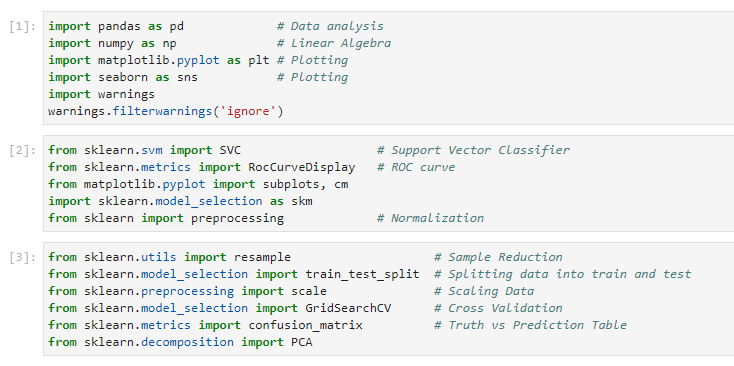

$\textbf{Figure 1}$

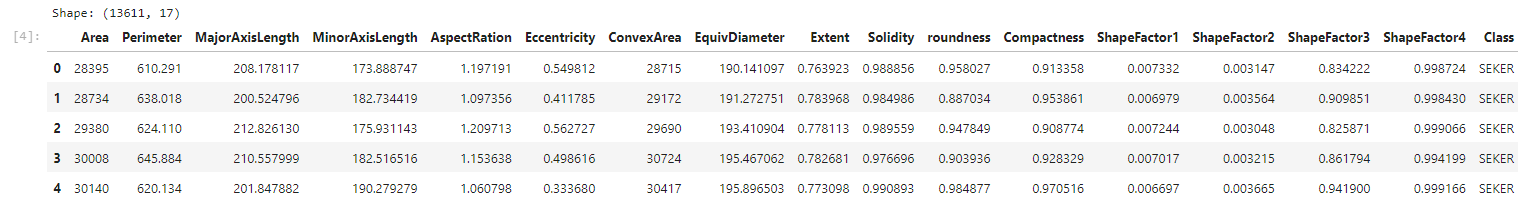

This figure shows us the first 5 samples of our data with the respective features and class.

**Key Functions:**

For down sampling:

>df = df.sample(n=3000, random_state=123)

* After downsizing our dataset, we select our predictors and response variables. In this case, we choose the features identified during preprocessing, where X consists of ''MajorAxisLength_tran', 'MinorAxisLength_tran', 'Eccentricity_tran', 'Extent_tran', 'Solidity_tran', 'roundness_tran', and 'ShapeFactor4_tran', and y represents the response variable 'Class' we wish to classify.

For data splitting and rescaling:

>X_train, X_test, y_train, y_test = train_test_split(X, y, text_size=0.3, random_state=123)
>X_train_scaled = scale(X_train)
>X_test_scaled = scale(X_test)

* We split our data into training (70%) and testing sets (30%). We fit our model on the training set and evaluate its performance on the testing set. Scaling and centering the data is essential for SVM with the RBF kernel to ensure that all features have a similar scale and are centered around zero. This preprocessing step is crucial as the RBF kernel computes distances between data points, and features with larger scales can disproportionately influence the kernel calculations, potentially leading to biased results.

For fitting the SVC:

>clf_svm = SVC(kernel="rbf", gamma=_, C=_, degree=_)
>clf_svm.fit(X_train_scaled, y_train)

>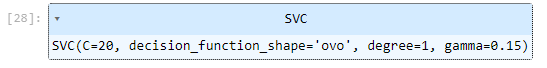

For Confusion table:

>y_test_hat = clf_svm.predict(X_test_scaled)
>confusion_table(y_test_hat, y_test)

>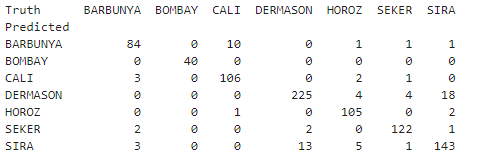

For Cross Validation:

>rbf_svm = SVC(kernel="rbf", gamma=1, C=1, degree=1)
>rbf_svm.fit(X_train_scaled, y_train)
>kf_radial = skm.KFold(5, random_state=0, shuffle=True)
>{'C': 1, 'degree': 1, 'gamma': 0.25}

>

For plotting SVM:

>svm_rbf_3 = SVC(kernel="rbf", C=100, gamma=0.01, degree=1, decision_function_shape='ovo')
>svm_rbf_3.fit(X_train, y_train_encoded)
>fig, ax = subplots(figsize=...)

And for ROC:

>clf_svm2 = SVC(kernel="rbf", C=10, gamma=0.01, degree=1, decision_function_shape='ovo')
>clf_svm2.fit(X_train_scaled, y_train_dm['BOMBAY'])
>fig, ax = subplots(figsize=(8, 8))
>for (X_, y_, c, name) in color=c) ax=ax)

* The ROC curve is useful for testing binary classifiers, but since my classes weren't binary, I had to break each classification into a binary 1 or 0. This allowed me to evaluate the classifier's performance in distinguishing between each class and the rest. Despite this additional step, the ROC curve remained effective in assessing the classifier's ability to discriminate between classes. We Decided to look at BOMBAY for this specific case. Note that BOMBAY has a very high ROC which is mostlikely due to the fact that when we look at the SVM graph, it is the number of points farthest away from the rest, so predicting new values coming in should not be so difficult and we should almost get it right most of the time.

# Data visualization 

$\textbf{Figure 1}$
> 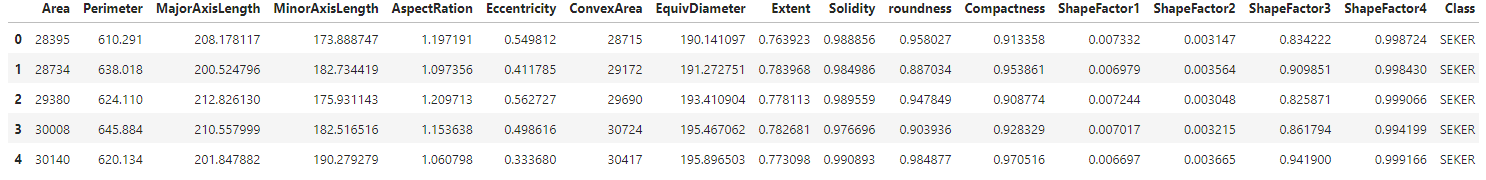


$\textbf{Figure 2}$
> 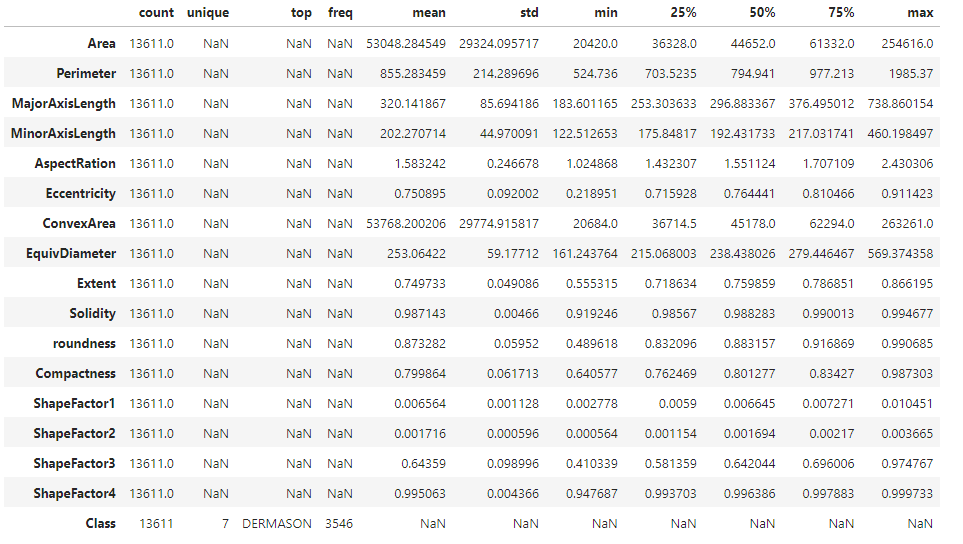


$\textbf{Figure 3}$
>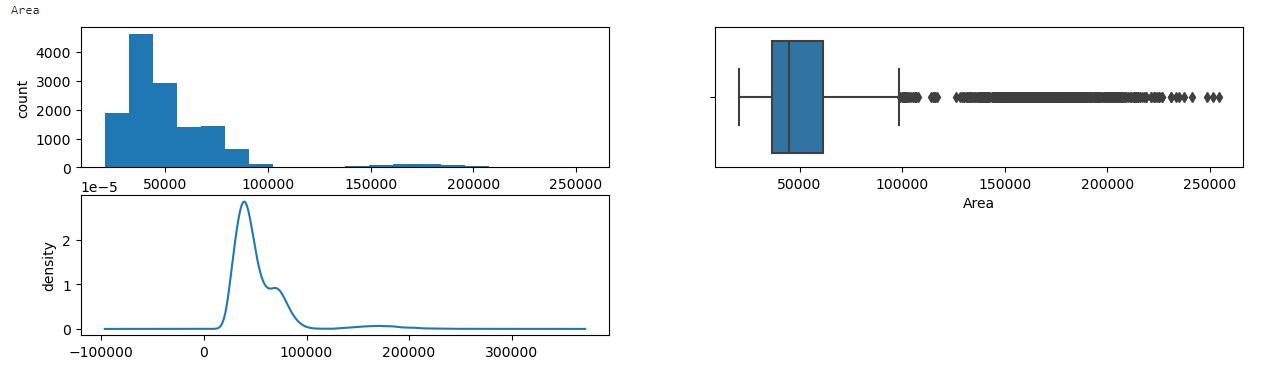


$\textbf{Figure 4}$
>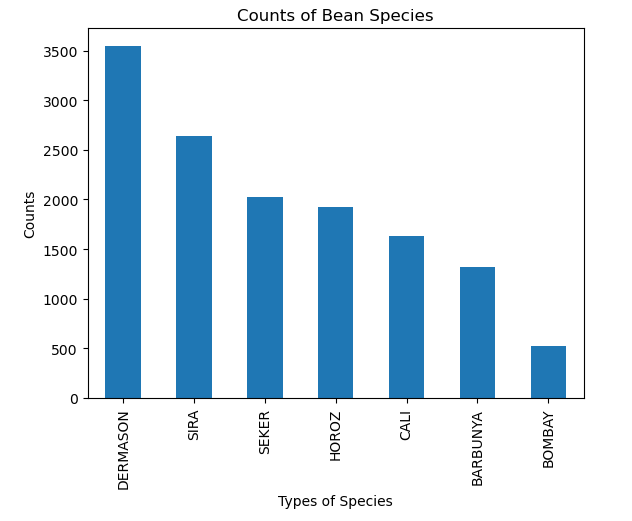


$\textbf{Figure 5}$
>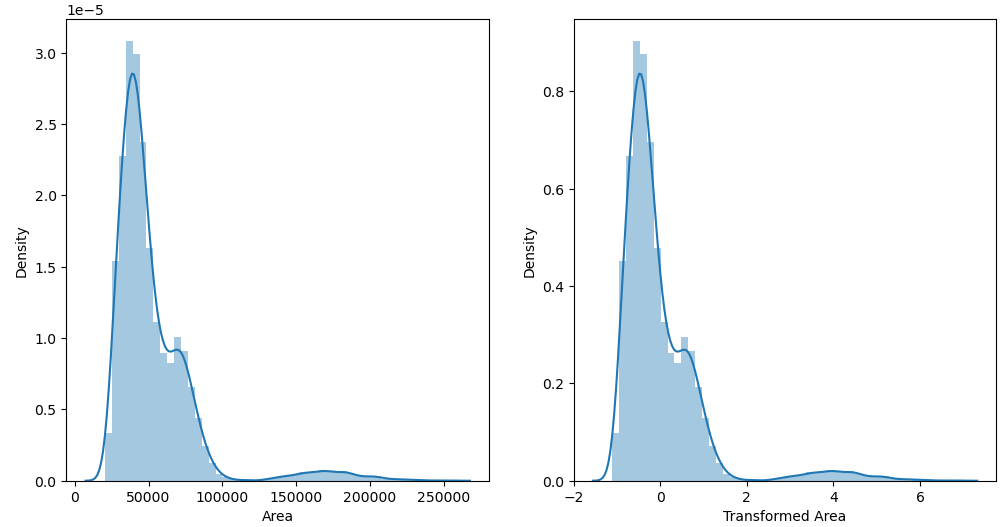


$\textbf{Figure 6}$
>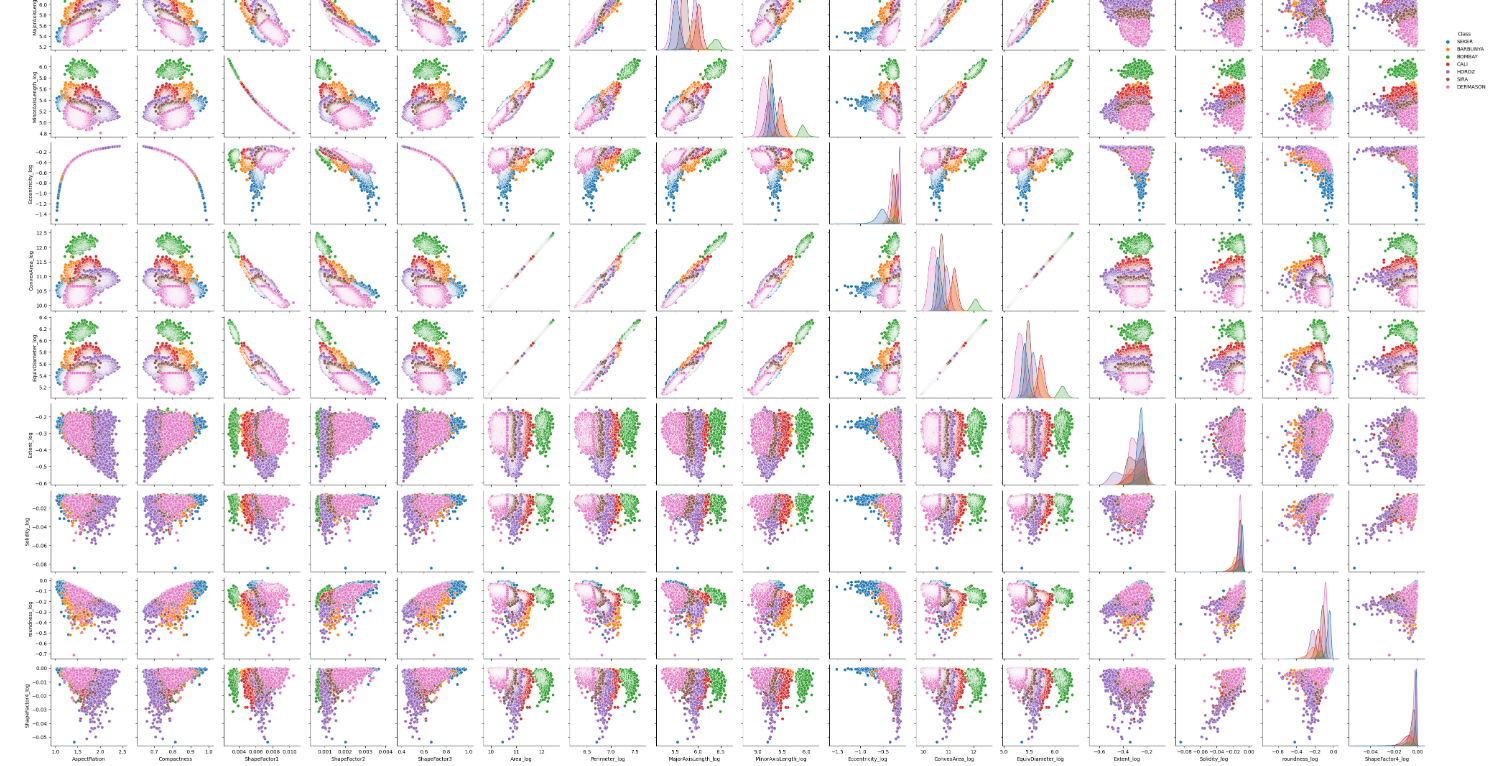


$\textbf{Figure 7}$
>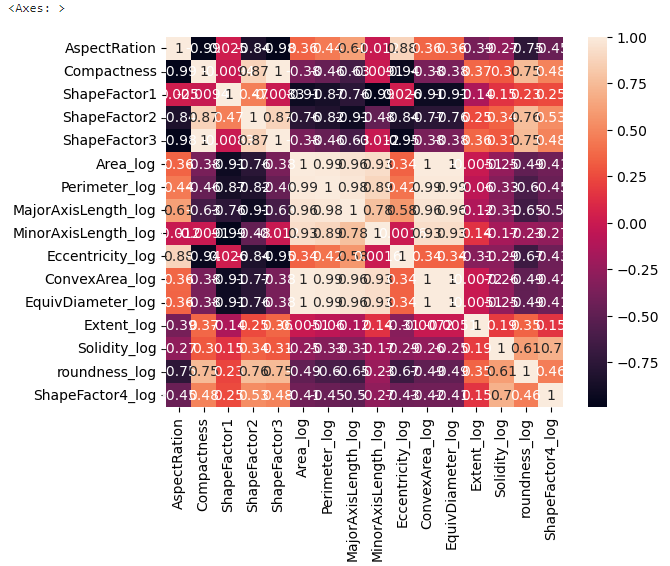


$\textbf{Figure 8}$
>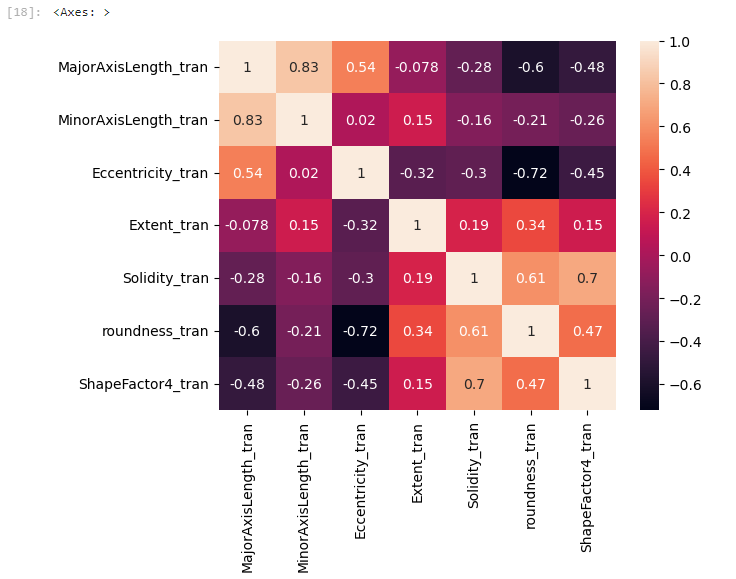


$\textbf{Figure 9}$
>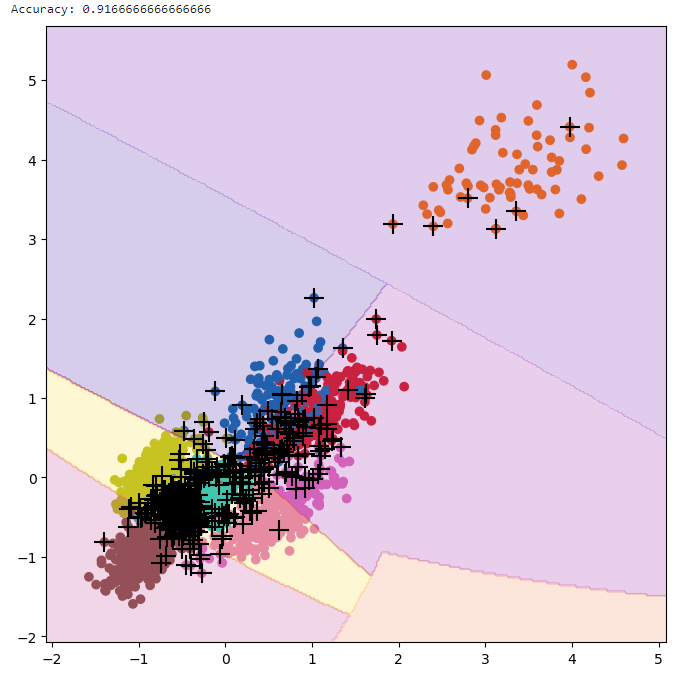


$\textbf{Figure 10}$
> 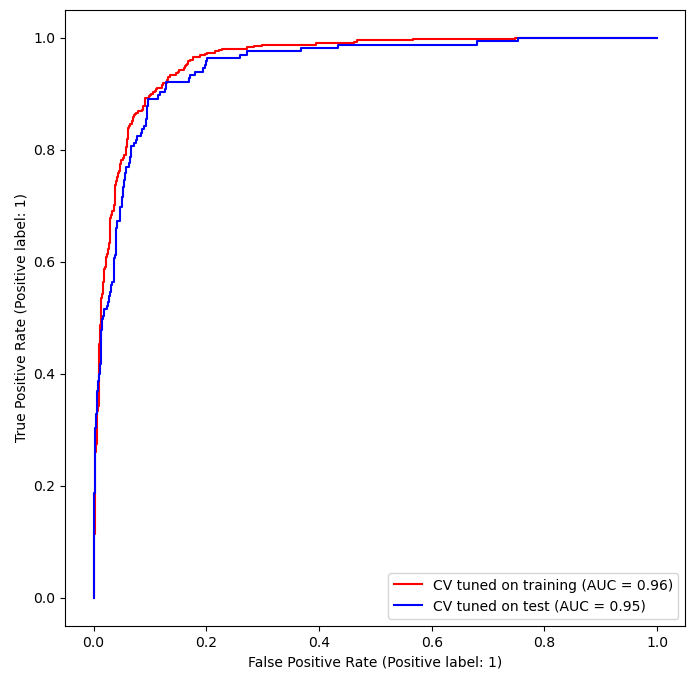


### Data analysis

In this study, my goal was to classify different types of dry beans using SVM's Radial Basis function. However, I encountered several challenges along the way. Although missing data wasn't a significant issue, I faced substantial skewness and high correlation in some features. To address this, I removed features with exceptionally high correlation to streamline the analysis process. Subsequently, I applied transformations to features exhibiting skewness, bringing them closer to normalization and making the dataset more manageable.

Due to the large sample size, the Radial Basis Function SVM encountered limitations, prompting the need for data reduction. I mitigated this by downsamplithe method was to use random sampling to take 3000 data points to wortk with. This is more efficient because we keep the ratio of all the classes roughly the same by not introducing any biasples. I then fine-tuned the model settings to enhance its performance in sorting the beans by splitting the data into training and testing sets. Through 5-fold cross-validation, I identified the optimal model configuration: RBF with parameter20 C=1, gamm1=0.25, and degree=1.

To gain insights into the model's decision-making process, I utilized graphical representations. One such visualization was an SVM map, illustrating the different classifications separated by support vector classifiers. Additionally, I employed an ROC curve to assess the model's predictability of true pos which gave us a AUC of 95% for new testing data, and an accuracy of 91%itives. Notably, the AUC value for testing data slightly exceeded that of training, indicating better performance on new

This is a little better than the classification tree that I fit, which gave a 87% accuracry (in the code PDF). data.

In conclusion, this study underscores how optimizing model settings can effectively classify dry beans using SVM, despite initial challenges with data preprocessing and model scalability.